# 📊 Basic Sales Summary Analysis using SQLite and Python

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating and Populating the Sales Database

In [2]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL,
        date DATE
        )
''')

In [4]:
sample_data = [
    (1, 'Laptop', 3, 55000, '2025-01-10'),
    (2, 'Smartphone', 5, 20000, '2025-01-15'),
    (3, 'Tablet', 2, 15000, '2025-01-20'),
    (4, 'Headphones', 10, 2500, '2025-01-25'),
    (5, 'Smartwatch', 4, 12000, '2025-02-10'),
    (6, 'Monitor', 6, 18000, '2025-02-15'),
    (7, 'Keyboard', 15, 1200, '2025-02-20'),
    (8, 'Mouse', 20, 800, '2025-03-10'),
    (9, 'Printer', 2, 8500, '2025-03-15'),
    (10, 'Router', 5, 3000, '2025-03-20'),
]

In [5]:
cursor.execute("DELETE FROM sales")
cursor.executemany("INSERT INTO sales (id, product, quantity, price, date) VALUES (?,?,?,?,?)", sample_data)
conn.commit()
print("Sample sales data inserted.")

Sample sales data inserted.


## Running SQL Queries

In [6]:
df = pd.read_sql_query("SELECT * FROM sales", conn)
print("All sales record :")
df

All sales record :


,id,product,quantity,price,date
0,1,Laptop,3,55000.0,2025-01-10
1,2,Smartphone,5,20000.0,2025-01-15
2,3,Tablet,2,15000.0,2025-01-20
3,4,Headphones,10,2500.0,2025-01-25
4,5,Smartwatch,4,12000.0,2025-02-10
5,6,Monitor,6,18000.0,2025-02-15
6,7,Keyboard,15,1200.0,2025-02-20
7,8,Mouse,20,800.0,2025-03-10
8,9,Printer,2,8500.0,2025-03-15
9,10,Router,5,3000.0,2025-03-20


In [7]:
query1 = '''
    SELECT product,
        SUM(quantity) AS total_qty,
        SUM(quantity * price) AS revenue,
        strftime('%Y-%m-%d', date) AS ssale_date
    FROM sales
    GROUP BY product
'''

In [8]:
summary = pd.read_sql_query(query1, conn)
print("Sales Summary: ")
summary

Sales Summary: 


,product,total_qty,revenue,ssale_date
0,Headphones,10,25000.0,2025-01-25
1,Keyboard,15,18000.0,2025-02-20
2,Laptop,3,165000.0,2025-01-10
3,Monitor,6,108000.0,2025-02-15
4,Mouse,20,16000.0,2025-03-10
5,Printer,2,17000.0,2025-03-15
6,Router,5,15000.0,2025-03-20
7,Smartphone,5,100000.0,2025-01-15
8,Smartwatch,4,48000.0,2025-02-10
9,Tablet,2,30000.0,2025-01-20


In [9]:
query2 = """
    SELECT product,
        COUNT(*) AS sales_count,
        SUM(QUANTITY) AS total_qty,
        AVG(price) AS avg_price,
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
    ORDER BY revenue DESC
"""

In [10]:
avg_price = pd.read_sql_query(query2, conn)
print("Average price per product: ")
avg_price

Average price per product: 


,product,sales_count,total_qty,avg_price,revenue
0,Laptop,1,3,55000.0,165000.0
1,Monitor,1,6,18000.0,108000.0
2,Smartphone,1,5,20000.0,100000.0
3,Smartwatch,1,4,12000.0,48000.0
4,Tablet,1,2,15000.0,30000.0
5,Headphones,1,10,2500.0,25000.0
6,Keyboard,1,15,1200.0,18000.0
7,Printer,1,2,8500.0,17000.0
8,Mouse,1,20,800.0,16000.0
9,Router,1,5,3000.0,15000.0


In [11]:
query3 = """
    SELECT product,
        SUM(quantity) AS total_qty
    FROM sales
    GROUP BY product
    ORDER BY total_qty DESC
    LIMIT 1
"""

In [12]:
most_sold = pd.read_sql_query(query3, conn)
print("Most sold product (by total quantity) :")
most_sold

Most sold product (by total quantity) :


,product,total_qty
0,Mouse,20


In [13]:
query4 = """
    SELECT product,
        SUM(quantity * price) AS total_revenue
    FROM sales
    GROUP BY product
    ORDER BY total_revenue DESC
    LIMIT 1
"""

In [14]:
highest_revenue = pd.read_sql_query(query4, conn)
print("Highest revenue product :")
highest_revenue

Highest revenue product :


,product,total_revenue
0,Laptop,165000.0


In [15]:
query5 = """
    SELECT strftime('%Y-%m', date) AS month,
        product,
        SUM(quantity * price) AS monthly_revenue
    FROM sales
    GROUP BY month, product
"""

In [16]:
monthly_summary = pd.read_sql_query(query5, conn)
print("Monthly Revenue by Product: ")
monthly_summary

Monthly Revenue by Product: 


,month,product,monthly_revenue
0,2025-01,Headphones,25000.0
1,2025-01,Laptop,165000.0
2,2025-01,Smartphone,100000.0
3,2025-01,Tablet,30000.0
4,2025-02,Keyboard,18000.0
5,2025-02,Monitor,108000.0
6,2025-02,Smartwatch,48000.0
7,2025-03,Mouse,16000.0
8,2025-03,Printer,17000.0
9,2025-03,Router,15000.0


In [17]:
query6 = """
SELECT strftime('%Y-%m-%d', date) AS sale_date,
       product,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY sale_date, product
"""

In [18]:
daily_sale = pd.read_sql_query(query6, conn)
print("Daily Sale by Product:")
daily_sale

Daily Sale by Product:


,sale_date,product,revenue
0,2025-01-10,Laptop,165000.0
1,2025-01-15,Smartphone,100000.0
2,2025-01-20,Tablet,30000.0
3,2025-01-25,Headphones,25000.0
4,2025-02-10,Smartwatch,48000.0
5,2025-02-15,Monitor,108000.0
6,2025-02-20,Keyboard,18000.0
7,2025-03-10,Mouse,16000.0
8,2025-03-15,Printer,17000.0
9,2025-03-20,Router,15000.0


In [19]:
query7 = """
    SELECT month, product, MAX(revenue) AS max_monthly_revenue
    FROM (
        SELECT strftime('%Y-%m', date) AS month,
        product,
        SUM(quantity * price) AS revenue
        FROM sales
        GROUP BY month, product
    )
    GROUP BY month
"""

In [20]:
bestproduct_month = pd.read_sql_query(query7, conn)
print("Best selling product each month :")
bestproduct_month

Best selling product each month :


,month,product,max_monthly_revenue
0,2025-01,Laptop,165000.0
1,2025-02,Monitor,108000.0
2,2025-03,Printer,17000.0


In [21]:
query8 = """
SELECT strftime('%Y-%m-%d', date) AS day,
       SUM(quantity * price) AS daily_revenue
FROM sales
GROUP BY day
ORDER BY day
"""

In [22]:
daily = pd.read_sql_query(query8, conn)
print("Daily revenue :")
daily

Daily revenue :


,day,daily_revenue
0,2025-01-10,165000.0
1,2025-01-15,100000.0
2,2025-01-20,30000.0
3,2025-01-25,25000.0
4,2025-02-10,48000.0
5,2025-02-15,108000.0
6,2025-02-20,18000.0
7,2025-03-10,16000.0
8,2025-03-15,17000.0
9,2025-03-20,15000.0


## Data Analysis & Visualization

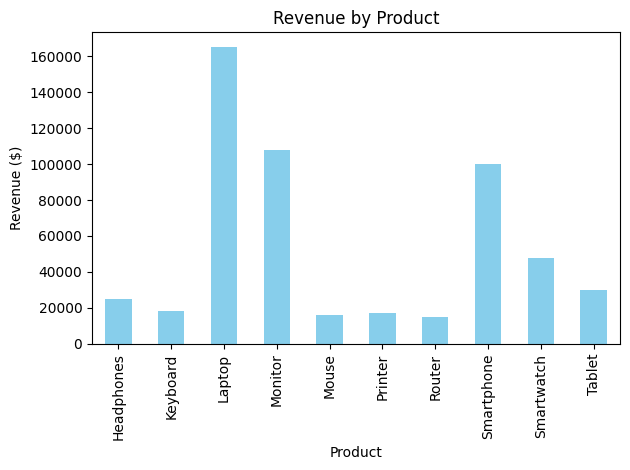

<Figure size 640x480 with 0 Axes>

In [23]:
summary.plot(kind='bar', x='product', y ='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart1.png")

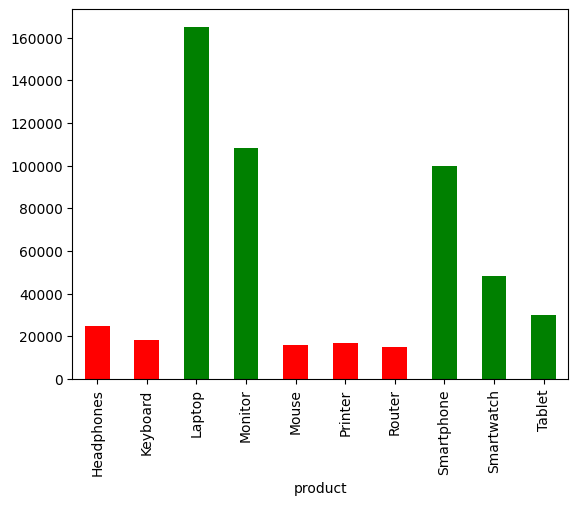

In [24]:
colors = summary['revenue'].apply(lambda x: 'green' if x > 25000 else 'red')
summary.plot(kind='bar', x='product', y='revenue', color=colors, legend=False)
plt.savefig("sales_chart2.png")

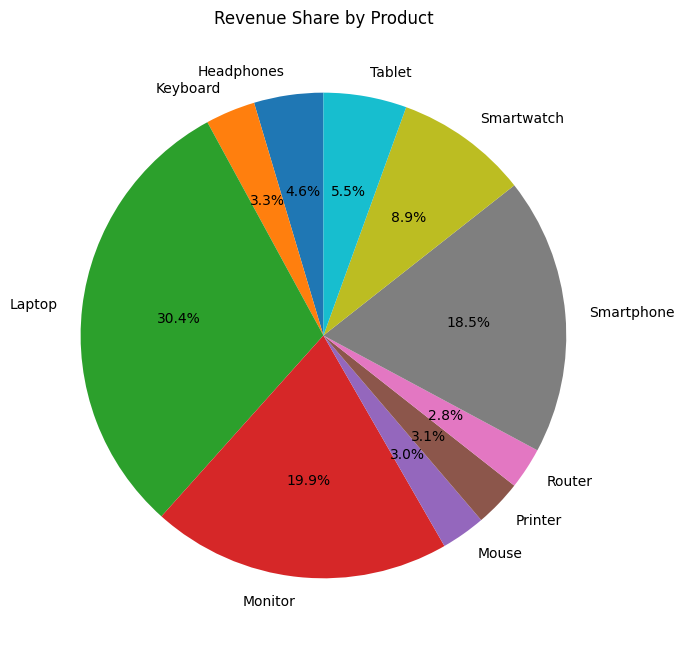

<Figure size 640x480 with 0 Axes>

In [25]:
summary.set_index('product')['revenue'].plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(7, 7))
plt.title("Revenue Share by Product")
plt.ylabel("")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart3.png")

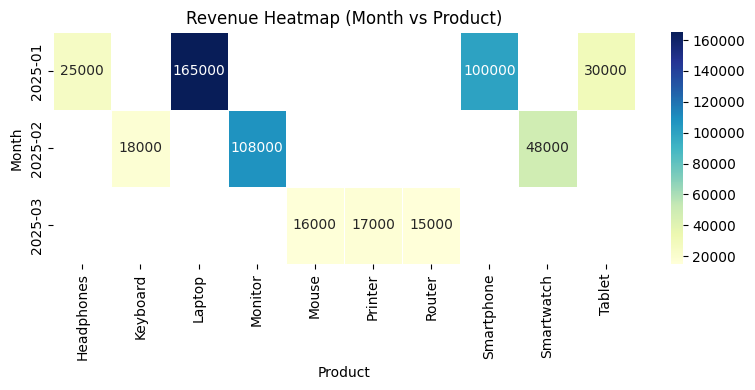

<Figure size 640x480 with 0 Axes>

In [26]:
monthly_pivot = monthly_summary.pivot(index='month', columns='product', values='monthly_revenue')
plt.figure(figsize=(8, 4))
sns.heatmap(monthly_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Revenue Heatmap (Month vs Product)")
plt.xlabel("Product")
plt.ylabel("Month")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart4.png")

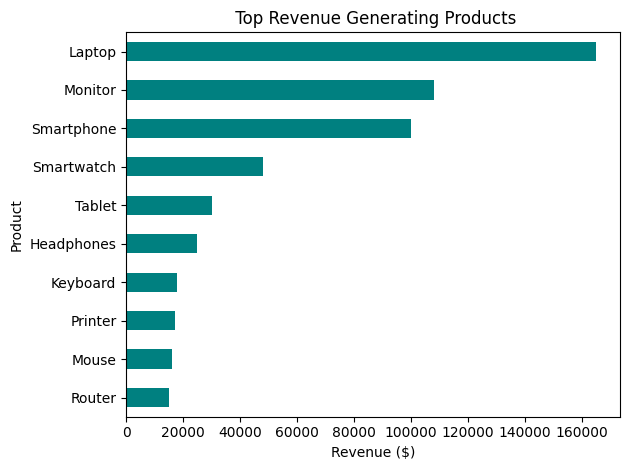

<Figure size 640x480 with 0 Axes>

In [27]:
summary.sort_values(by='revenue', ascending=True).plot(
    kind='barh', x='product', y='revenue', color='teal', legend=False
)
plt.title(" Top Revenue Generating Products")
plt.xlabel("Revenue ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart5.png")

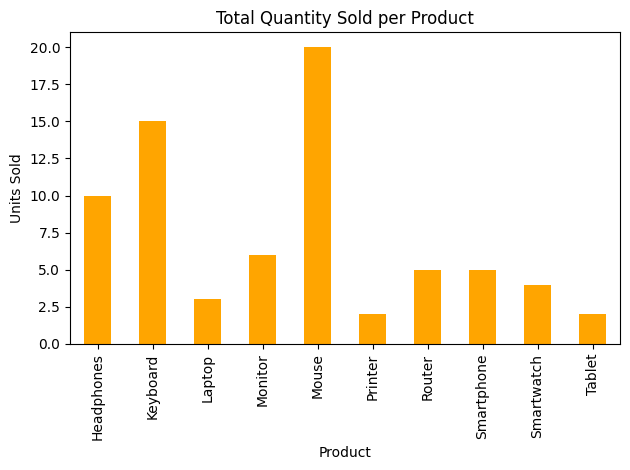

<Figure size 640x480 with 0 Axes>

In [28]:
summary.plot(kind='bar', x='product', y='total_qty', color='orange', legend=False)
plt.title("Total Quantity Sold per Product")
plt.xlabel("Product")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()
plt.savefig("sales_chart6.png")

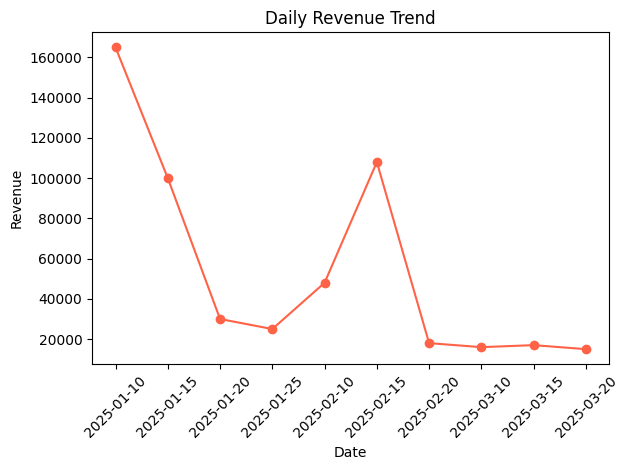

<Figure size 640x480 with 0 Axes>

In [29]:
plt.plot(daily['day'], daily['daily_revenue'], marker='o', color='tomato')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("sales_chart7.png")

## Summary & Learnings

1. **Top Revenue Drivers**: Laptops, Monitors, and Smartphones lead in revenue, contributing nearly 70% of total sales. These should remain the focus for strategic planning and promotions.

2. **Underperformers Need Attention**: Products like Routers, Printers, and Mice have minimal revenue impact. Consider bundling, discount strategies, or evaluating their market relevance.

4. **Value vs. Volume Gap**: Laptops generate highest revenue ($165K+) with few units sold, while mice sell most units (20) with minimal revenue impact.

5. **Monthly Product Shifts**: January favors laptops/smartphones, February shows strong monitor sales, March sees mostly accessory purchases.

6. **Sharp Revenue Decline**: Revenue peaked in early January (160K+), spiked again mid-February (110K), then fell consistently to ~$20K through March.

7. **Bundling Opportunity**: High-volume accessories (keyboards, mice, headphones) could boost profits through strategic bundling with high-value items.